In [2]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import math
import argparse
import datetime
import math
from time import time

In [3]:
ratio = 10**(-5)
print(ratio)


# scalar interpolant
def alpha(t):
    return np.sqrt((ratio - ratio**t)/(ratio - 1))

def alpha_dot(t):
    return -0.5*1/alpha(t)*(ratio**t)*np.log(ratio)/(ratio - 1)
    
def beta(t):
    return np.sqrt((ratio**t - 1)/(ratio - 1))

def beta_dot(t):
    return 0.5*1/beta(t)*(ratio**t)*np.log(ratio)/(ratio - 1)

1e-05


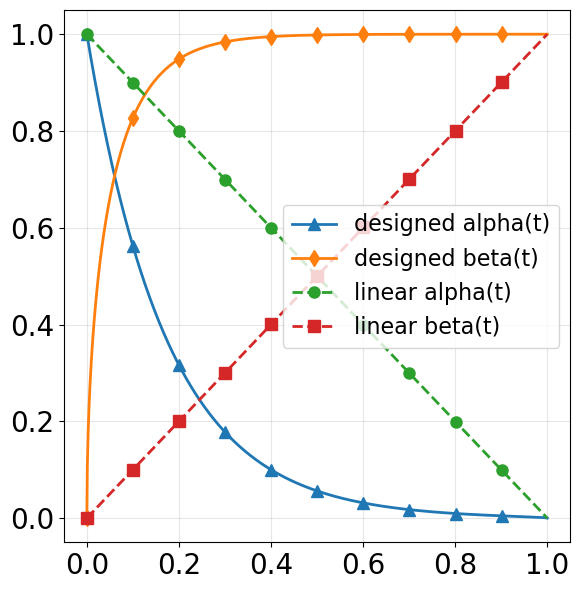

In [6]:
### show figures of alpha, beta

tmp_t = np.linspace(0,1,1000)
alpha_t = [alpha(t) for t in tmp_t]
markers = ['o', 's', '^', 'd', 'v']
plt.figure(figsize=(6, 6))

plt.plot(tmp_t, alpha_t, label="designed alpha(t)", marker=markers[2], markersize=8, markevery=100, linewidth=2)
beta_t = [beta(t) for t in tmp_t]
plt.plot(tmp_t, beta_t, label="designed beta(t)", marker=markers[3], markersize=8, markevery=100, linewidth=2)
plt.plot(tmp_t, [1-t for t in tmp_t], '--', label="linear alpha(t)", marker=markers[0], markersize=8, markevery=100, linewidth=2)
plt.plot(tmp_t, [t for t in tmp_t], '--', label="linear beta(t)", marker=markers[1], markersize=8, markevery=100, linewidth=2)



# plt.xlabel("t", fontsize=12)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size

plt.tight_layout()
plt.savefig(f"NS-res128-designed-schedule.pdf", dpi=300)